# P2 submission

---

**Requirements**
P2 submission notebook should show :
- That you can handle the data in its size.
- That you understand what’s in the data (formats, distributions, missing values, correlations, etc.).
- That you considered ways to enrich, filter, transform the data according to your needs.
- That you have a reasonable plan and ideas for methods you’re going to use, giving their essential mathematical details in the notebook.
- That your plan for analysis and communication is reasonable and sound, potentially discussing alternatives to your choices that you considered but dropped.



**Project proposal**

Best breweries in the world 

The idea behind the identification of the best breweries is that the consumer might be more interested to try new and/or original products that come from a good brewery. This ranking is based on the ratings given by the tasters, but the ratings have to be weighted by the number of ratings for the best beers, the quality and emotions transmitted in the text following the different ratings. Some ratings might be biased or unclear so some of them might have to be filtered. Once the ranking is determined a visualisation is to be created to convey properly the attributes of the best breweries (number of “quality” beers, rankings by styles).

*Feedback*

Find and visualize the best breweries - clarity: 75 - creativity: 75 - feasibility: 75, using beer-level reviews as a proxy for brewery reviews is doable, yet will require detailed analysis. 

---

# Beer reviews EDA

This dataset consists of beer reviews from two Beer rating websites: BeerAdvocate and RateBeer, for a period of 17 years ranging from 2001 to 2017.

Metadata about users, beers, and breweries (CSV)

In [7]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import os
import spacy

# Handle size of the data

### Load ratings.txt

In [8]:
def load_txt_file(website):
    if website == 'BeerAdvocate':
        # Specify the directory containing the text files
        directory = './../../dataset_BeerReviews/BeerAdvocate/rates_comp/'
    else:
        directory = './../../dataset_BeerReviews/RateBeer/rates_comp/'

    # Initialize an empty list to store DataFrames
    dfs = []

    # Loop through the files in reverse order (ratings-5.txt to ratings-1.txt)
    for i in range(1, 0, -1):
        file_name = f'ratings-{i}.txt'
        file_path = os.path.join(directory, file_name)

        with open(file_path, 'r', encoding='utf-8') as f:
            text = f.read()

        # Remove double quotes at the beginning of each line
        data = re.sub('"', '', text)
        data = re.sub(r'^"', '', data, flags=re.MULTILINE)

        # Split the text into individual beer reviews
        beer_reviews = data.split('beer_name')

        # Extract the beer information from each review
        beer_data = []
        for review in beer_reviews:
            beer_info = {}
            for line in [entry.split(':', 1) for entry in review.split('\n') if ':' in entry]:# and 'text' not in entry]:
                if line:  # Check if the list is not empty
                    key, value = line[0].strip(), line[1].strip()
                    beer_info[key] = value
            beer_data.append(beer_info)

        # Convert the beer data into a DataFrame
        df = pd.DataFrame(beer_data)

        # Append the DataFrame to the list
        dfs.append(df)

    # Concatenate all DataFrames into a single DataFrame
    final_df = pd.concat(dfs, ignore_index=True)

    # Rename the columns
    final_df.columns = [
        'beer_name',
        'beer_id',
        'brewery_name',
        'brewery_id',
        'style',
        'abv',
        'date',
        'user_name',
        'user_id',
        'appearance',
        'aroma',
        'palate',
        'taste',
        'overall',
        'rating',
        'text'
    ]
    return final_df

#ratings_BA = load_txt_file('BeerAdvocate')
ratings_RB = load_txt_file('RateBeer')

In [9]:
ratings_RB.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,1461664800,Manslow,175852,2,4,2,4,8,2.00,"Puszka 0,33l dzięki Christoph . Kolor jasnozło..."
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1487329200,MAGICuenca91,442761,2,3,2,4,8,1.90,Cerveza pale lager gabonesa. MÃ¡s floja que la...
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1466762400,Sibarh,288889,3,3,2,3,5,1.60,"Kolor- złoty, klarowny. Piana - drobna, średni..."
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1451646000,fombe89,250510,4,3,1,2,5,1.50,"Botella, de GabÃ³n regalo familiar.31/01/2015C..."


### Load the other data

In [10]:
# BeerAdvocate
beers_BA = pd.read_csv("./dataset_BeerReviews/BeerAdvocate/beers.csv")
breweries_BA = pd.read_csv("./dataset_BeerReviews/BeerAdvocate/breweries.csv")
users_BA = pd.read_csv("./dataset_BeerReviews/BeerAdvocate/users.csv")

# RateBeer
beers_RB = pd.read_csv("./dataset_BeerReviews/RateBeer/beers.csv")
breweries_RB = pd.read_csv("./dataset_BeerReviews/RateBeer/breweries.csv")
users_RB = pd.read_csv("./dataset_BeerReviews/RateBeer/users.csv")

# matched_beer_data
beers_matched = pd.read_csv("./dataset_BeerReviews/matched_beer_data/beers.csv", header=1)
breweries_matched = pd.read_csv("./dataset_BeerReviews/matched_beer_data/breweries.csv", header = 1)
ratings_matched = pd.read_csv("./dataset_BeerReviews/matched_beer_data/ratings.csv", header=1)
users_approx = pd.read_csv("./dataset_BeerReviews/matched_beer_data/users_approx.csv", header=1)
users_matched = pd.read_csv("./dataset_BeerReviews/matched_beer_data/users.csv", header=1)

## EDA

Do univariate and multivariate analysis


- formats
- distributions
- missing values
- correlations
- etc...

In [23]:
def get_float(df):
    df[['beer_id', 'brewery_id', 'abv', 'user_id', 'appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']] = df[['beer_id', 'brewery_id', 'abv', 'user_id', 'appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']].astype('float64')
    return df
get_float(ratings_RB)
def get_string(df):
    df[['text']]=df[['text']].astype("string")
    return df
get_string(ratings_RB)
ratings_RB.dtypes

beer_name               object
beer_id                float64
brewery_name            object
brewery_id             float64
style                   object
abv                    float64
date                    object
user_name               object
user_id                float64
appearance             float64
aroma                  float64
palate                 float64
taste                  float64
overall                float64
rating                 float64
text            string[python]
dtype: object

In [12]:
def get_feature_stats(df):
    """
    Obtains descriptive statistics for all features and percentage of missing 
    values
    
    Parameters
    ----------
    df : DataFrame
        Containing all data

    Returns
    -------
    stats : DataFrame
            Containing the statistics for all features.
    """
    ### BEGIN SOLUTION
    numerical = df.describe(include= ['float64', 'int64'])
    categorical = df.describe(include= ['object'])
    stats = pd.concat([numerical, categorical])
    #stats = df.describe(include= 'all') # alternative
    
    # Select the desired statistics
    stats = stats.loc[['mean', 'std', '50%', 'unique', 'top', 'freq']]
    percentage = df.isnull().sum(axis = 0)*100 / len(df)
    stats.loc['missing_values'] = np.array(percentage)
    ### END SOLUTION
    return stats

beers_BA_stats = get_feature_stats(beers_BA)
beers_BA_stats

,beer_id,brewery_id,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,beer_name,brewery_name,style
mean,148556.817141,21335.895860,29.887267,9.221417,3.721034,84.633284,84.806559,6.491370,3.717594,-0.408295,1.029207,3.747771,NaN,NaN,NaN
std,84307.593397,15385.715656,231.010063,68.866445,0.476003,4.052723,10.507735,2.054071,0.464248,0.806491,17.295308,0.484775,NaN,NaN,NaN
50%,148867.000000,24075.000000,2.000000,1.000000,3.780000,85.000000,87.000000,6.000000,3.770000,-0.321596,0.000000,3.808333,NaN,NaN,NaN
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,236209,14098,104
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oktoberfest,Rock Bottom Restaurant & Brewery,American IPA
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,577,1219,30433
missing_values,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.690282,78.206913,97.969540,12.828009,11.694555,85.654665,0.0,89.932449


In [8]:
#
#### 1.3
#def plot_features(df, title):
#    continuous_cols = list(df._get_numeric_data().columns)
#    print(continuous_cols)
#    categorical_cols = list(set(df.columns) - set(continuous_cols))
#    print(categorical_cols)
#    fig, axes = plt.subplots(2, 3, figsize=(15,10))
#    for i, col in enumerate(df.columns):
#        ax = axes[i // 3, i % 3]
#        print("avt isna")
#        data = df[~df[col].isna()]
#        print("apres isna")
#        if col in continuous_cols:
#            sns.histplot(data=data[col], bins=50, ax=ax) #Filter out nan values in the features
#        elif col in categorical_cols:
#            sns.countplot(data=data, x=col, ax=ax)
#        else:
#            print(col)
#    fig.suptitle(title)
#    fig.tight_layout()
#    
#    return plt
#    
#plot_features(users_BA.iloc[:20],"Raw data")
##plt.show()

### Distribution of the words


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
ratings_RB.dropna



<bound method DataFrame.dropna of                   beer_name   beer_id                brewery_name  brewery_id  \
0                       NaN       NaN                         NaN         NaN   
1         33 Export (Gabon)  410549.0                     Sobraga      3198.0   
2       Castel Beer (Gabon)  105273.0                     Sobraga      3198.0   
3       Castel Beer (Gabon)  105273.0                     Sobraga      3198.0   
4       Castel Beer (Gabon)  105273.0                     Sobraga      3198.0   
...                     ...       ...                         ...         ...   
446790    Hitachino Nest XH   10889.0  Kiuchi Brewery (Hitachino)      1928.0   
446791    Hitachino Nest XH   10889.0  Kiuchi Brewery (Hitachino)      1928.0   
446792    Hitachino Nest XH   10889.0  Kiuchi Brewery (Hitachino)      1928.0   
446793    Hitachino Nest XH   10889.0  Kiuchi Brewery (Hitachino)      1928.0   
446794    Hitachino Nest XH   10889.0  Kiuchi Brewery (Hitachino)      1928

In [42]:
def get_top_n_i_gram(corpus, i, n=None):
    vec = CountVectorizer(ngram_range=(i,i)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words_RB = get_top_n_i_gram(ratings_RB['text'], 1, 20)
common_bigrams_RB = get_top_n_i_gram(ratings_RB['text'], 2, 20)
common_trigrams_RB = get_top_n_i_gram(ratings_RB['text'], 3, 20)
#common_words_BA = get_top_n_words(ratings_BA['text'], 20)

#### For unigrams

<Axes: xlabel='Review Text'>

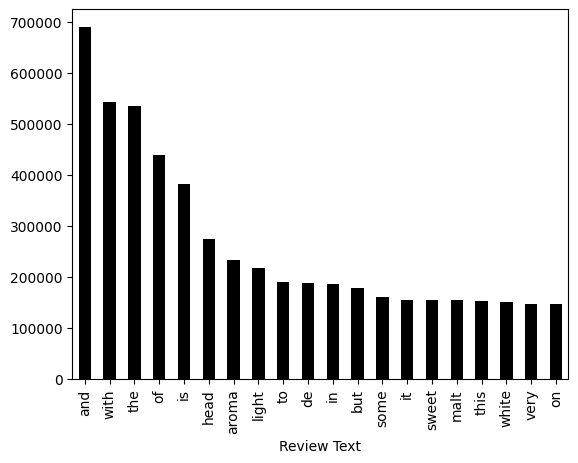

In [48]:
df1 = pd.DataFrame(common_words_RB, columns = ['Review Text', 'count'])
df1.groupby('Review Text').sum()['count'].sort_values(ascending=False).plot( kind='bar', y='Count', color='black')

### For bigrams

<Axes: xlabel='Review Text'>

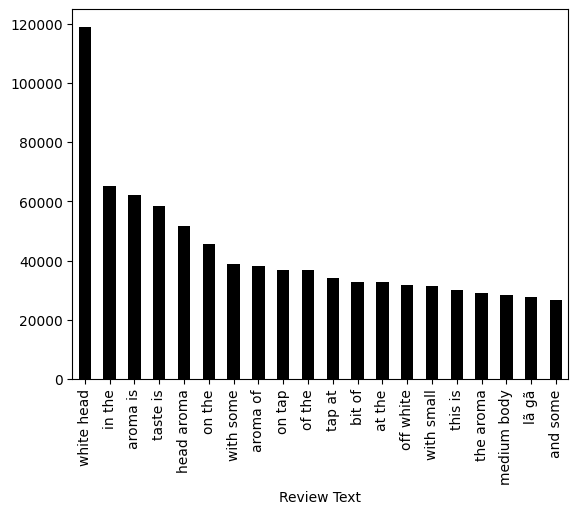

In [44]:
df2 =  pd.DataFrame(common_bigrams_RB, columns = ['Review Text', 'count'])
df2.groupby('Review Text').sum()['count'].sort_values(ascending=False).plot( kind='bar', y='Count', color='black')

#### For trigrams

<Axes: title={'center': 'Top 20 trigrams in review before removing stop words'}, xlabel='Review Text'>

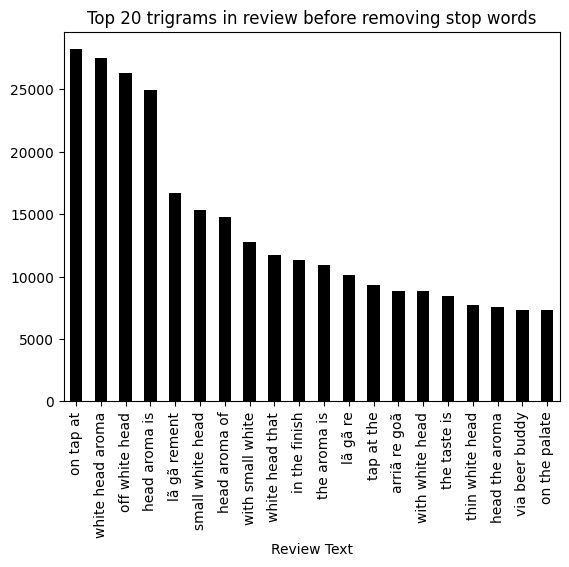

In [46]:
df3 = pd.DataFrame(common_trigrams_RB, columns = ['Review Text', 'count'])
df3.groupby('Review Text').sum()['count'].sort_values(ascending=False).plot( kind='bar', y='Count', color='black', title='Top 20 trigrams in review before removing stop words')

## Data preprocessing

- enrichment
- filtering
- transformation

In [51]:
def get_top_n_i_gram_wo_stopwords(corpus, i, n=None):
    vec = CountVectorizer(ngram_range=(i,i), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words_RB_filtered = get_top_n_i_gram_wo_stopwords(ratings_RB['text'], 1, 20)
common_bigrams_RB_filtered = get_top_n_i_gram_wo_stopwords(ratings_RB['text'], 2, 20)
common_trigrams_RB_filtered = get_top_n_i_gram_wo_stopwords(ratings_RB['text'], 3, 20)

#### For unigrams

<Axes: xlabel='Review Text'>

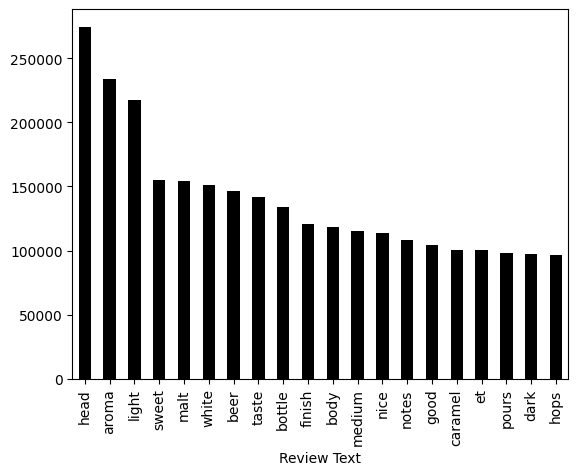

In [53]:
df1_filtered = pd.DataFrame(common_words_RB_filtered, columns = ['Review Text', 'count'])
df1_filtered.groupby('Review Text').sum()['count'].sort_values(ascending=False).plot( kind='bar', y='Count', color='black')

#### For bigrams


<Axes: xlabel='Review Text'>

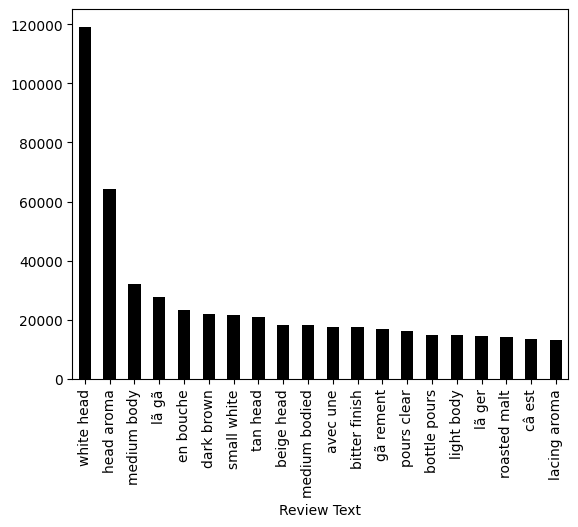

In [54]:
df2_filtered = pd.DataFrame(common_bigrams_RB_filtered, columns = ['Review Text', 'count'])
df2_filtered.groupby('Review Text').sum()['count'].sort_values(ascending=False).plot( kind='bar', y='Count', color='black')

<Axes: xlabel='Review Text'>

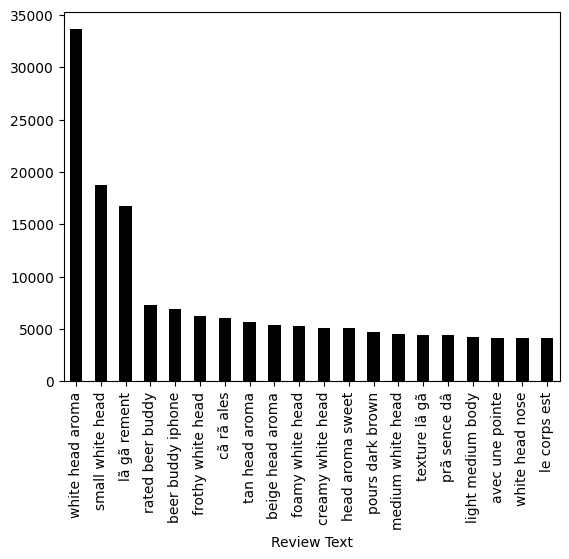

In [55]:
df3_filtered = pd.DataFrame(common_trigrams_RB_filtered, columns = ['Review Text', 'count'])
df3_filtered.groupby('Review Text').sum()['count'].sort_values(ascending=False).plot( kind='bar', y='Count', color='black')

## Feasibility check of project's methods
- give their essential mathematical details in the notebook.

In [ ]:
# todo

## Alternatives considered
- analysis and communication is reasonable

In [ ]:
# todo